In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=25c4ff0533a8fa3ff2c37f19ed31caeb7d67c917cf29d12dc09ba32ef0839bc3
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [3]:
!pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#IMPORTING AND IMPUTING MISSING VALUES

In [4]:
from impyute.imputation.cs import mice

In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer

# load the dataset
df_train = pd.read_excel('/content/drive/MyDrive/Chem_ML_challenge/Train_Data_Final.xlsx')
df_test = pd.read_excel('/content/drive/MyDrive/Chem_ML_challenge/Test_Data.xlsx')

# replace -200 with NaN
df_train = df_train.replace(-200, pd.np.nan)
df1_train = df_train.iloc[:, 2:-2]

df_test = df_test.replace(-200, pd.np.nan)
df1_test = df_test.iloc[:, 3:-1]

# start the MICE training
imputed_training=mice(df1_train.values)
imputed_testing=mice(df1_test.values)

<ipython-input-5-409c76396a1d>:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df_train = df_train.replace(-200, pd.np.nan)
<ipython-input-5-409c76396a1d>:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df_test = df_test.replace(-200, pd.np.nan)


In [6]:
df_imp_train = pd.DataFrame(imputed_training)
df_imp_test = pd.DataFrame(imputed_testing)

In [7]:
df_imp_train.columns = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T','AH']
df_imp_test.columns = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T','AH']

In [8]:
df_imp_train.to_excel('/content/drive/MyDrive/Chem_ML_challenge/Train_Data_Modified.xlsx')
df_imp_train.to_excel('/content/drive/MyDrive/Chem_ML_challenge/Test_Data_Modified.xlsx')

#ENCODING THE LABELS AND CALCULATING RH


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_imp_train_class = df_train.iloc[:,-2]
df_labels = le.fit_transform(df_imp_train_class)

In [10]:
labels = le.fit_transform(['Dry', 'Elevated', 'High', 'Ideal', 'Slightly Elevated'])
labels

array([0, 1, 2, 3, 4])

In [11]:
df_imp_train['RH_type'] = df_labels
#df_imp_train = df_imp_train.iloc[:,:-1]
df_imp_train

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,RH_type
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,0.757754,3
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,0.725487,3
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,0.750239,4
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,0.786713,4
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,0.788794,4
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.4,937.50,3.667817,692.00,192.9,937.00,149.0,804.75,737.00,5.775,0.328561,3
7996,1.1,896.25,2.611733,627.00,157.8,1033.25,126.3,781.50,610.00,5.375,0.330403,3
7997,1.0,907.25,2.415395,613.75,149.8,1052.00,119.8,781.75,627.00,5.100,0.335822,3
7998,1.1,902.25,2.397211,612.50,130.3,1049.25,109.5,776.75,565.75,4.825,0.330045,3


In [12]:
df_imp_train = df_imp_train.iloc[:,:-1]
df_imp_train

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,0.757754
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,0.725487
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,0.750239
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,0.786713
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,0.788794
...,...,...,...,...,...,...,...,...,...,...,...
7995,1.4,937.50,3.667817,692.00,192.9,937.00,149.0,804.75,737.00,5.775,0.328561
7996,1.1,896.25,2.611733,627.00,157.8,1033.25,126.3,781.50,610.00,5.375,0.330403
7997,1.0,907.25,2.415395,613.75,149.8,1052.00,119.8,781.75,627.00,5.100,0.335822
7998,1.1,902.25,2.397211,612.50,130.3,1049.25,109.5,776.75,565.75,4.825,0.330045


In [13]:
import numpy as np
# calculate the relative humidity (RH) using temperature (T) and absolute humidity (AH)
R_w = 461.5 * 10**-3 # J/(kg⋅K)
P_c = 22.064*10**6 # Mpa
T_c = 647.096 # K
# T = 13.6 # C
# Constant for the Saturation Pressure
a1 = -7.85951783
a2 = 1.84408259
a3 = -11.7866497
a4 = 22.6807411
a5 = -15.9618719
a6 = 1.80122502
# Calculating the Saturation Pressure
v = 1-((df_imp_train['T']+273.15)/T_c)
P_s = P_c*np.exp((T_c/(df_imp_train['T']+273.15))*((a1*v)+(a2*v**1.5)+(a3*v**3)+(a4*v**3.5)+(a5*v**4)+(a6*v**7.5)))
# Calculating the Relative Humidity
df_imp_train['RH'] = (df_imp_train['AH']* (10/1.34) * R_w * 100 * (df_imp_train['T']+ 273.15))/P_s
df_imp_train

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,RH
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,0.757754,48.037444
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,0.725487,46.851322
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,0.750239,52.853458
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,0.786713,58.641782
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,0.788794,58.244650
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.4,937.50,3.667817,692.00,192.9,937.00,149.0,804.75,737.00,5.775,0.328561,34.275732
7996,1.1,896.25,2.611733,627.00,157.8,1033.25,126.3,781.50,610.00,5.375,0.330403,35.387712
7997,1.0,907.25,2.415395,613.75,149.8,1052.00,119.8,781.75,627.00,5.100,0.335822,36.627152
7998,1.1,902.25,2.397211,612.50,130.3,1049.25,109.5,776.75,565.75,4.825,0.330045,36.658131


In [ ]:
df_imp_train.to_excel('/content/drive/MyDrive/Chem_ML_challenge/Train_Data_Imputed.xlsx')

In [14]:
# Calculating the Saturation Pressure
v = 1-((df_imp_test['T']+273.15)/T_c)
P_s = P_c*np.exp((T_c/(df_imp_test['T']+273.15))*((a1*v)+(a2*v**1.5)+(a3*v**3)+(a4*v**3.5)+(a5*v**4)+(a6*v**7.5)))
# Calculating the Relative Humidity
df_imp_test['RH'] = (df_imp_test['AH']* (10/1.34) * R_w * 100 * (df_imp_test['T']+ 273.15))/P_s
df_imp_test

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,RH
0,0.8,863.00,1.504175,545.00,85.600000,1119.25,78.400000,748.75,483.50,4.325,0.320679,36.820098
1,0.6,860.75,1.200205,518.25,102.921527,1140.75,86.264525,737.50,481.50,3.875,0.325031,38.456141
2,0.6,852.25,0.831325,481.50,66.600000,1186.50,65.100000,725.75,496.00,3.800,0.332693,39.560331
3,0.6,879.25,0.962585,495.25,75.100000,1146.50,72.500000,752.75,622.75,3.300,0.349882,43.020844
4,0.6,899.50,1.268602,524.50,96.900000,1090.00,84.600000,780.25,695.75,3.650,0.357384,42.924809
...,...,...,...,...,...,...,...,...,...,...,...,...
1352,3.1,1314.25,13.529605,1101.25,471.700000,538.50,189.800000,1374.25,1728.50,21.850,0.756824,29.335803
1353,2.4,1162.50,11.355157,1027.00,353.300000,603.75,179.200000,1263.50,1269.00,24.325,0.711864,23.955275
1354,2.4,1142.00,12.374538,1062.50,293.000000,603.25,174.700000,1240.75,1092.00,26.900,0.640649,18.663963
1355,2.1,1002.50,9.547187,960.50,234.500000,701.50,155.700000,1041.00,769.75,28.325,0.513866,13.839449


#SCALING THE DATSETS

In [15]:
from sklearn.preprocessing import StandardScaler

object = StandardScaler()
df_scaled_train = object.fit_transform(df_imp_train)
df_scaled_train = pd.DataFrame(df_scaled_train)

#df_scaled = df_scaled.iloc[:,:-1]

df_scaled_train.columns = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T','AH','RH']
df_scaled_train['RH_type'] = df_labels
df_scaled_train

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,RH,RH_type
0,0.336572,1.184537,0.179126,0.336411,-0.284411,0.814366,0.221484,0.566507,0.605966,-0.674461,-0.827953,-0.047936,3
1,-0.076814,0.875733,-0.149213,-0.003492,-0.586662,1.270597,-0.258229,0.159000,-0.142467,-0.709378,-0.910877,-0.118706,3
2,0.060981,1.375972,-0.201988,-0.061547,-0.452328,1.139552,0.244327,0.146002,0.115460,-0.872321,-0.847266,0.239412,4
3,0.060981,1.255186,-0.171463,-0.027837,-0.255625,0.953177,0.427075,0.235455,0.443098,-0.977070,-0.753530,0.584774,4
4,-0.352404,0.784573,-0.529670,-0.450141,-0.452328,1.391936,0.290014,-0.051252,0.206717,-0.959611,-0.748180,0.561079,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.490199,-0.741213,-0.906357,-0.987619,-0.155355,0.351339,1.043848,-2.146893,-0.738806,-1.585196,-1.930969,-0.869031,3
7996,-0.696892,-0.929230,-1.045920,-1.231076,-0.323752,0.725061,0.525302,-2.217997,-1.060740,-1.631751,-1.926235,-0.802684,3
7997,-0.765789,-0.879092,-1.071867,-1.280703,-0.362133,0.797864,0.376819,-2.217232,-1.017646,-1.663758,-1.912309,-0.728733,3
7998,-0.696892,-0.901882,-1.074270,-1.285385,-0.455686,0.787186,0.141531,-2.232523,-1.172910,-1.695765,-1.927157,-0.726885,3


In [72]:
df = pd.DataFrame(df_labels)
df

,0
0,3
1,3
2,4
3,4
4,4
...,...
7995,3
7996,3
7997,3
7998,3


In [16]:
df_scaled_test = object.fit_transform(df_imp_test)
df_scaled_test = pd.DataFrame(df_scaled_test)

#df_scaled = df_scaled.iloc[:,:-1]

df_scaled_test.columns = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T','AH','RH']
#df_scaled_train['RH_type'] = df_labels
df_scaled_test

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,RH
0,-0.880920,-1.274494,-1.063384,-1.313830,-1.106182,1.685800,-1.216557,-1.552038,-1.279770,-1.063481,-1.352909,-0.784955
1,-1.031628,-1.286075,-1.114121,-1.427188,-1.014468,1.784918,-1.067833,-1.595686,-1.284518,-1.133437,-1.336530,-0.685497
2,-1.031628,-1.329826,-1.175691,-1.582921,-1.206783,1.995832,-1.468069,-1.641274,-1.250096,-1.145096,-1.307694,-0.618371
3,-1.031628,-1.190853,-1.153782,-1.524654,-1.161778,1.811426,-1.328130,-1.536518,-0.949201,-1.222825,-1.243000,-0.408001
4,-1.031628,-1.086624,-1.102704,-1.400702,-1.046351,1.550954,-1.099310,-1.429823,-0.775905,-1.168415,-1.214762,-0.413839
...,...,...,...,...,...,...,...,...,...,...,...,...
1352,0.852232,1.048146,0.943800,1.043366,0.938136,-0.991539,0.890097,0.874794,1.675763,1.660917,0.288597,-1.239938
1353,0.324751,0.267070,0.580860,0.728720,0.311233,-0.690727,0.689644,0.445103,0.584946,2.045675,0.119380,-1.567029
1354,0.324751,0.161554,0.751006,0.879157,-0.008043,-0.693032,0.604545,0.356837,0.164762,2.445979,-0.148650,-1.888697
1355,0.098688,-0.556470,0.279088,0.446916,-0.317788,-0.240086,0.245242,-0.418159,-0.600235,2.667507,-0.625818,-2.181988


#RANDOM FOREST CLASSIFIER

In [67]:
# import required libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# define the input features and target variable
X = df_scaled_train[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T','AH','RH']]
y = df_scaled_train['RH_type']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a random forest classifier and fit it to the training data
clf = RandomForestClassifier(n_estimators=550, random_state=1)
clf.fit(X_train, y_train)

# make predictions on the testing data and print the classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97       498
           1       0.98      0.98      0.98       381
           2       0.97      0.99      0.98       291
           3       0.97      0.99      0.98       757
           4       0.98      0.98      0.98       473

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400



In [81]:
df2 = pd.DataFrame(y_train)
df2 = df2.reset_index(drop=True)

In [68]:
y_pred_train = clf.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1072
           1       1.00      1.00      1.00       867
           2       1.00      1.00      1.00       688
           3       1.00      1.00      1.00      1916
           4       1.00      1.00      1.00      1057

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600



In [ ]:
df3 = pd.DataFrame(y_pred_train)
df3

In [86]:
df4 = pd.concat([df2, df3], axis=1)
df4

,RH_type,0
0,0,0
1,3,3
2,0,0
3,1,1
4,3,3
...,...,...
5595,3,3
5596,1,1
5597,3,3
5598,4,4


In [ ]:
#HYPERPARAMETER TUNING

from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [300, 350, 400, 450, 500, 550, 600]
#grid['learning_rate'] = [0.5 , 1.0, 1.5]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#XGBOOST CLASSFIER

In [19]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

xgb_cl = xgb.XGBClassifier()

X = df_scaled_train[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T','AH','RH']]
y = df_scaled_train['RH_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72)

xgb_cl.fit(X_train, y_train)

y_pred_xgb = xgb_cl.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       458
           1       0.97      0.99      0.98       364
           2       0.98      0.99      0.98       291
           3       0.97      0.99      0.98       811
           4       0.98      0.97      0.97       476

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400



In [23]:
y_pred_train = xgb_cl.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1072
           1       0.99      1.00      0.99       867
           2       0.99      1.00      0.99       688
           3       0.99      1.00      0.99      1916
           4       0.99      0.99      0.99      1057

    accuracy                           0.99      5600
   macro avg       0.99      0.99      0.99      5600
weighted avg       0.99      0.99      0.99      5600



#ADABOOST CLASSIFIER

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df_scaled_train[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T','AH','RH']]
y = df_scaled_train['RH_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=10), n_estimators=400, learning_rate=1)

#bdt_discrete = AdaBoostClassifier(
#    DecisionTreeClassifier(max_depth=2),
#    n_estimators=300,
#    learning_rate=1.5,
#    algorithm="SAMME",
#)

bdt_real.fit(X_train, y_train)
#bdt_discrete.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                   learning_rate=1, n_estimators=400)

In [26]:
y_pred_real = bdt_real.predict(X_test)
print(classification_report(y_test, y_pred_real))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       498
           1       0.99      0.99      0.99       381
           2       0.98      1.00      0.99       291
           3       0.98      0.99      0.98       757
           4       0.98      0.99      0.98       473

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400



In [27]:
y_pred_train = bdt_real.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1072
           1       1.00      1.00      1.00       867
           2       1.00      1.00      1.00       688
           3       1.00      1.00      1.00      1916
           4       1.00      1.00      1.00      1057

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600



In [ ]:
#HYPERPARAMETER TUNING

from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10))
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [400, 450, 500]
grid['learning_rate'] = [0.5 , 1.0, 1.5]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#NAIVE BAYES CLASSIFIER

In [28]:
df_imp_train_nb = df_imp_train
df_imp_train_nb['RH_type'] = df_labels
df_imp_train_nb

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,RH,RH_type
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,0.757754,48.037444,3
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,0.725487,46.851322,3
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,0.750239,52.853458,4
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,0.786713,58.641782,4
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,0.788794,58.244650,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.4,937.50,3.667817,692.00,192.9,937.00,149.0,804.75,737.00,5.775,0.328561,34.275732,3
7996,1.1,896.25,2.611733,627.00,157.8,1033.25,126.3,781.50,610.00,5.375,0.330403,35.387712,3
7997,1.0,907.25,2.415395,613.75,149.8,1052.00,119.8,781.75,627.00,5.100,0.335822,36.627152,3
7998,1.1,902.25,2.397211,612.50,130.3,1049.25,109.5,776.75,565.75,4.825,0.330045,36.658131,3


In [29]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

X = df_imp_train_nb[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T','AH','RH']]
y = df_imp_train_nb['RH_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

p =  make_pipeline(MinMaxScaler(), ComplementNB())
p.fit(X_train,y_train)

y_pred = p.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.91      0.61       498
           1       0.38      0.16      0.23       381
           2       0.27      0.95      0.42       291
           3       0.73      0.22      0.34       757
           4       0.00      0.00      0.00       473

    accuracy                           0.40      2400
   macro avg       0.37      0.45      0.32      2400
weighted avg       0.42      0.40      0.32      2400



Text(33.0, 0.5, 'Predicted label')

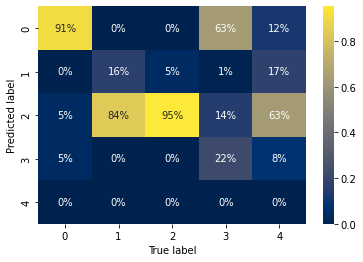

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, normalize="true")
# Plot the confusion matrix
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=labels, yticklabels=labels)
plt.xlabel("True label")
plt.ylabel("Predicted label")

#KNN CLASSIFIER

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df_scaled_train[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T','AH','RH']]
y = df_scaled_train['RH_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

y_pred = knn_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       498
           1       0.70      0.80      0.75       381
           2       0.89      0.80      0.85       291
           3       0.86      0.91      0.88       757
           4       0.77      0.70      0.73       473

    accuracy                           0.83      2400
   macro avg       0.83      0.82      0.82      2400
weighted avg       0.84      0.83      0.83      2400



#SVM CLASSIFIER

In [32]:
from sklearn import svm
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report

X = df_scaled_train[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T','AH','RH']]
y = df_scaled_train['RH_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
linear = svm.SVC(kernel='linear', C=5, decision_function_shape='ovo').fit(X_train, y_train)

y_pred = linear.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       498
           1       0.95      0.98      0.97       381
           2       0.99      0.97      0.98       291
           3       0.88      0.94      0.91       757
           4       0.97      0.95      0.96       473

    accuracy                           0.92      2400
   macro avg       0.93      0.92      0.93      2400
weighted avg       0.92      0.92      0.92      2400



In [38]:
rbf = svm.SVC(kernel='rbf', gamma=0.01, C=85, decision_function_shape='ovo').fit(X_train, y_train)

y_pred = rbf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       498
           1       0.98      0.97      0.97       381
           2       0.98      0.98      0.98       291
           3       0.92      0.97      0.95       757
           4       0.96      0.97      0.96       473

    accuracy                           0.95      2400
   macro avg       0.96      0.95      0.96      2400
weighted avg       0.95      0.95      0.95      2400



In [35]:
poly = svm.SVC(kernel='poly', degree=5, C=100, decision_function_shape='ovo').fit(X_train, y_train)

y_pred = poly.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       498
           1       0.88      0.81      0.84       381
           2       0.96      0.89      0.92       291
           3       0.79      0.96      0.86       757
           4       0.87      0.75      0.80       473

    accuracy                           0.86      2400
   macro avg       0.88      0.85      0.86      2400
weighted avg       0.86      0.86      0.86      2400



In [36]:
sig = svm.SVC(kernel='sigmoid', C=500, decision_function_shape='ovo').fit(X_train, y_train)

y_pred = sig.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.54      0.53       498
           1       0.34      0.41      0.37       381
           2       0.38      0.56      0.45       291
           3       0.49      0.43      0.46       757
           4       0.33      0.23      0.27       473

    accuracy                           0.43      2400
   macro avg       0.41      0.43      0.42      2400
weighted avg       0.43      0.43      0.42      2400



#GRADIENT BOOSTING

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X = df_scaled_train[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T','AH','RH']]
y = df_scaled_train['RH_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72)

gbc = GradientBoostingClassifier(n_estimators=300, learning_rate=1, max_depth=15, random_state=0).fit(X_train, y_train)

y_pred = gbc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       458
           1       0.97      0.99      0.98       364
           2       0.99      0.99      0.99       291
           3       0.96      0.98      0.97       811
           4       0.95      0.97      0.96       476

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400



#DEEP LEARNING CLASSIFIERS

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

X = df_scaled_train[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T','AH','RH']]
y = df_scaled_train['RH_type']

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

dummy_y = np_utils.to_categorical(encoded_Y)

def baseline_model():
 # create model
 model = Sequential()
 model.add(Dense(8, input_dim=12, activation='relu'))
 model.add(Dense(5, activation='softmax'))
 # Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

#ENSEMBLED MODELS

In [40]:
#ENSEMBLING XGBOOST, SVM(RBF KERNEL)

from sklearn.ensemble import VotingClassifier

#create a dictionary of our models
estimators=[('xgb', xgb_cl), ('svm_rbf', rbf)]
#create our voting classifier, inputting our models
ensemble_xs = VotingClassifier(estimators, voting='hard')

In [41]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report

X = df_scaled_train[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T','AH','RH']]
y = df_scaled_train['RH_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ensemble_xs.fit(X_train, y_train)
y_pred = ensemble_xs.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       498
           1       0.97      0.99      0.98       381
           2       0.98      0.98      0.98       291
           3       0.98      0.98      0.98       757
           4       0.99      0.95      0.97       473

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400



In [42]:
#ENSEMBLING XGBOOST, GRADIENTBOOSTING

from sklearn.ensemble import VotingClassifier

#create a dictionary of our models
estimators=[('xgb', xgb_cl),  ('gradboost', gbc)]
#create our voting classifier, inputting our models
ensemble_xg = VotingClassifier(estimators, voting='hard')

In [43]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report

X = df_scaled_train[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T','AH','RH']]
y = df_scaled_train['RH_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ensemble_xg.fit(X_train, y_train)
y_pred = ensemble_xg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       498
           1       0.98      0.99      0.98       381
           2       0.98      0.99      0.99       291
           3       0.98      0.99      0.98       757
           4       0.99      0.97      0.98       473

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400



In [44]:
#ENSEMBLING XGBOOST, SVM(RBF KERNEL), ADABOOST

from sklearn.ensemble import VotingClassifier

#create a dictionary of our models
estimators=[('xgb', xgb_cl), ('svm_rbf', rbf), ('adaboost', bdt_real)]
#create our voting classifier, inputting our models
ensemble_xsa = VotingClassifier(estimators, voting='hard')

In [45]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report

X = df_scaled_train[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T','AH','RH']]
y = df_scaled_train['RH_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ensemble_xsa.fit(X_train, y_train)
y_pred = ensemble_xsa.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       498
           1       0.99      0.98      0.99       381
           2       0.98      1.00      0.99       291
           3       0.98      1.00      0.99       757
           4       0.99      0.98      0.99       473

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400



In [54]:
#ENSEMBLING XGBOOST, RANDOMFOREST, ADABOOST

from sklearn.ensemble import VotingClassifier

#create a dictionary of our models
estimators=[('xgb', xgb_cl), ('rand_for', clf), ('adaboost', bdt_real)]
#create our voting classifier, inputting our models
ensemble_xra = VotingClassifier(estimators, voting='hard')

In [55]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report

X = df_scaled_train[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T','AH','RH']]
y = df_scaled_train['RH_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ensemble_xra.fit(X_train, y_train)
y_pred = ensemble_xra.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       498
           1       0.99      0.99      0.99       381
           2       0.98      1.00      0.99       291
           3       0.98      0.99      0.98       757
           4       0.98      0.99      0.98       473

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400



In [52]:
#ENSEMBLING XGBOOST, RANDOMFOREST, GRADIENTBOOSTING, ADABOOST

from sklearn.ensemble import VotingClassifier

#create a dictionary of our models
estimators=[('xgb', xgb_cl), ('rand_for', clf), ('gradboost', gbc), ('adaboost', bdt_real)]
#create our voting classifier, inputting our models
ensemble_xrga = VotingClassifier(estimators, voting='hard')

In [53]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report

X = df_scaled_train[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T','AH','RH']]
y = df_scaled_train['RH_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ensemble_xrga.fit(X_train, y_train)
y_pred = ensemble_xrga.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       498
           1       0.98      0.99      0.99       381
           2       0.98      1.00      0.99       291
           3       0.98      0.99      0.98       757
           4       0.98      0.98      0.98       473

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400



#STACKED GENERALIZATION

In [90]:
#STACKING XGBOOST, RANDOMFOREST, ADAFOREST

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

estimators=[('xgb', xgb_cl), ('rand_for', clf), ('adaboost', bdt_real)]
final_estimator = GradientBoostingClassifier(n_estimators=25, subsample=1, min_samples_leaf=25, max_features=1,random_state=42)
stack_xra = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [91]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report

X = df_scaled_train[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T','AH','RH']]
y = df_scaled_train['RH_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

stack_xra.fit(X_train, y_train)
y_pred = stack_xra.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       498
           1       0.99      0.99      0.99       381
           2       0.98      1.00      0.99       291
           3       0.99      0.99      0.99       757
           4       0.99      0.98      0.98       473

    accuracy                           0.98      2400
   macro avg       0.98      0.99      0.98      2400
weighted avg       0.99      0.98      0.98      2400



In [89]:
y_pred_train = stack_xra.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1072
           1       1.00      1.00      1.00       867
           2       1.00      1.00      1.00       688
           3       1.00      1.00      1.00      1916
           4       1.00      1.00      1.00      1057

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600



In [56]:
#STACKING XGBOOST, RANDOMFOREST, GRADIENTBOOSTING, ADABOOSTING

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

estimators=[('xgb', xgb_cl), ('rand_for', clf), ('gradboost', gbc), ('adaboost', bdt_real)]
final_estimator = GradientBoostingClassifier(n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,random_state=42)
stack_xrga = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [57]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report

X = df_scaled_train[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T','AH','RH']]
y = df_scaled_train['RH_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

stack_xrga.fit(X_train, y_train)
y_pred = stack_xrga.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       498
           1       0.99      0.98      0.99       381
           2       0.98      1.00      0.99       291
           3       0.99      0.99      0.99       757
           4       0.99      0.98      0.98       473

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400



#SUBMISSION FILE CREATION

In [100]:
#USING STACKED XGBOOST, RANDOMFOREST, ADABOOST
import pandas as pd

y_pred_subtest = stack_xra.predict(df_scaled_test)

submission = pd.DataFrame([])
submission['id'] = df_test.iloc[:,-1]
submission['RH_type'] = y_pred_subtest
submission['RH_type'].mask(submission['RH_type'] == 0, 'Dry', inplace=True)
submission['RH_type'].mask(submission['RH_type'] == 1, 'Elevated', inplace=True)
submission['RH_type'].mask(submission['RH_type'] == 2, 'High', inplace=True)
submission['RH_type'].mask(submission['RH_type'] == 3, 'Ideal', inplace=True)
submission['RH_type'].mask(submission['RH_type'] == 4, 'Slightly Elevated', inplace=True)
submission

,id,RH_type
0,1.0,Ideal
1,2.0,Ideal
2,3.0,Ideal
3,4.0,Ideal
4,5.0,Ideal
...,...,...
1352,1353.0,Dry
1353,1354.0,Dry
1354,1355.0,Dry
1355,1356.0,Dry


In [101]:
submission.to_csv('/content/drive/MyDrive/Chem_ML_challenge/st_xra_Submission.csv')

In [ ]:
#USING XGBOOST
import pandas as pd

y_pred_subtest = xgb_cl.predict(df_scaled_test)

submission = pd.DataFrame([])
submission['id'] = df_test.iloc[:,-1]
submission['RH_type'] = y_pred_subtest
submission['RH_type'].mask(submission['RH_type'] == 0, 'Dry', inplace=True)
submission['RH_type'].mask(submission['RH_type'] == 1, 'Elevated', inplace=True)
submission['RH_type'].mask(submission['RH_type'] == 2, 'High', inplace=True)
submission['RH_type'].mask(submission['RH_type'] == 3, 'Ideal', inplace=True)
submission['RH_type'].mask(submission['RH_type'] == 4, 'Slightly Elevated', inplace=True)
submission

In [ ]:
import pandas as pd

y_pred_subtest = ensemble_xsg.predict(df_scaled_test)

submission = pd.DataFrame([])
submission['id'] = df_test.iloc[:,-1]
submission['RH_type'] = y_pred_subtest
submission['RH_type'].mask(submission['RH_type'] == 0, 'Dry', inplace=True)
submission['RH_type'].mask(submission['RH_type'] == 1, 'Elevated', inplace=True)
submission['RH_type'].mask(submission['RH_type'] == 2, 'High', inplace=True)
submission['RH_type'].mask(submission['RH_type'] == 3, 'Ideal', inplace=True)
submission['RH_type'].mask(submission['RH_type'] == 4, 'Slightly Elevated', inplace=True)
submission

,id,RH_type
0,1.0,Ideal
1,2.0,Ideal
2,3.0,Ideal
3,4.0,Ideal
4,5.0,Ideal
...,...,...
1352,1353.0,Dry
1353,1354.0,Dry
1354,1355.0,Dry
1355,1356.0,Dry


In [ ]:
submission.to_csv('/content/drive/MyDrive/Chem_ML_challenge/Submission_xsg.csv')

In [ ]:
import pandas as pd

y_pred_subtest = ensemble_xsga.predict(df_scaled_test)

submission = pd.DataFrame([])
submission['id'] = df_test.iloc[:,-1]
submission['RH_type'] = y_pred_subtest
submission['RH_type'].mask(submission['RH_type'] == 0, 'Dry', inplace=True)
submission['RH_type'].mask(submission['RH_type'] == 1, 'Elevated', inplace=True)
submission['RH_type'].mask(submission['RH_type'] == 2, 'High', inplace=True)
submission['RH_type'].mask(submission['RH_type'] == 3, 'Ideal', inplace=True)
submission['RH_type'].mask(submission['RH_type'] == 4, 'Slightly Elevated', inplace=True)
submission

,id,RH_type
0,1.0,Ideal
1,2.0,Ideal
2,3.0,Ideal
3,4.0,Ideal
4,5.0,Ideal
...,...,...
1352,1353.0,Dry
1353,1354.0,Dry
1354,1355.0,Dry
1355,1356.0,Dry


In [ ]:
submission.to_csv('/content/drive/MyDrive/Chem_ML_challenge/Submission_xsga.csv')

In [ ]:
import pandas as pd

y_pred_subtest = stack_xsg.predict(df_scaled_test)

submission = pd.DataFrame([])
submission['id'] = df_test.iloc[:,-1]
submission['RH_type'] = y_pred_subtest
submission['RH_type'].mask(submission['RH_type'] == 0, 'Dry', inplace=True)
submission['RH_type'].mask(submission['RH_type'] == 1, 'Elevated', inplace=True)
submission['RH_type'].mask(submission['RH_type'] == 2, 'High', inplace=True)
submission['RH_type'].mask(submission['RH_type'] == 3, 'Ideal', inplace=True)
submission['RH_type'].mask(submission['RH_type'] == 4, 'Slightly Elevated', inplace=True)
submission

,id,RH_type
0,1.0,Ideal
1,2.0,Ideal
2,3.0,Ideal
3,4.0,Ideal
4,5.0,Ideal
...,...,...
1352,1353.0,Dry
1353,1354.0,Dry
1354,1355.0,Dry
1355,1356.0,Dry


In [ ]:
submission.to_csv('/content/drive/MyDrive/Chem_ML_challenge/Submission_stack_xsg.csv')